# Comparison to Dharma-Wardana Hydrogen 2019 paper
[DOI: https://doi.org/10.1103/PhysRevB.100.155143](https://doi.org/10.1103/PhysRevB.100.155143)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")


ModuleNotFoundError: No module named 'mendeleev'


### Set Parameters in Paper and Plot

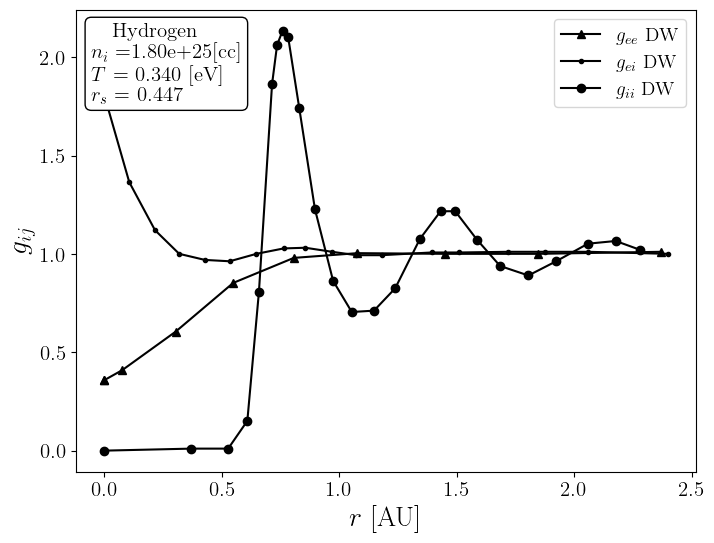

In [2]:
name='Hydrogen'
Z, A = 1, 1 #Hydrogen

Te_eV = 0.34 # eV
Ti_eV = Te_eV
ri_AU = 0.4473 # AU
ri_cm = ri_AU/cm_to_AU
ni_cc = n_from_rs(ri_cm)

def g_comparison(ax):
    gee_data = read_csv('./DW_gee.txt', header=1, delim_whitespace=True)
    gei_data = read_csv('./DW_gei.txt', header=1, delim_whitespace=True)
    gii_data = read_csv('./DW_gii.txt', header=1, delim_whitespace=True)    
    text = r"{0}\\$n_i= ${1:.2e}[cc]\\ $T$ = {2:.3f} [eV]\\ $r_s$ = {3:.3f} ".format(name,ni_cc, Te_eV, ri_AU)
    props = dict(boxstyle='round', facecolor='w')
    ax.text(0.025,0.97, text, fontsize=15, transform=ax.transAxes, verticalalignment='top', bbox=props)
    
    ax.plot(np.array(gee_data['r/ri'])*ri_AU, gee_data['gee'], 'k^-', label=r"$g_{ee}$ DW")
    ax.plot(np.array(gei_data['r/ri'])*ri_AU, gei_data['gei'], 'k.-', label=r"$g_{ei}$ DW")
    ax.plot(np.array(gii_data['r/ri'])*ri_AU, gii_data['gii'], 'ko-', label=r"$g_{ii}$ DW")
    
    ax.set_ylabel(r"$g_{ij}$", fontsize=20)
    ax.set_xlabel(r"$r$ [AU]", fontsize=20)
    ax.tick_params(labelsize=15)
    ax.legend(fontsize=14, loc='upper right')
    
fig, ax = plt.subplots(figsize=(8,6))
g_comparison(ax)

#### Run Ornstein-Zernike Closure

In [3]:
# c_s_k_guess = plasma_oz.hnc.c_s_k_matrix.copy()

In [4]:
plasma_oz_geom = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})

plasma_oz_geom.run_hnc()#c_s_k_guess = c_s_k_guess)

Te_in_eV: 0.340
Ti_in_eV: 0.340
0: Initial condition Total Error: 1.438e+01
Exiting status 0, reverting to best index so far: 1212
Final iter:1213, Total Error: 9.997e-09


In [5]:
plasma_oz_th = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'thermal'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})

plasma_oz_th.run_hnc()#c_s_k_guess = c_s_k_guess)

Te_in_eV: 0.340
Ti_in_eV: 0.340
0: Initial condition Total Error: 1.438e+01
Exiting status 0, reverting to best index so far: 1213
Final iter:1214, Total Error: 9.907e-09


In [6]:
plasma_oz_geom_βP = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})

plasma_oz_geom_βP.run_hnc()#c_s_k_guess = c_s_k_guess)

Te_in_eV: 0.340
Ti_in_eV: 0.340


/home/zach/plasma/hnc/hnc/PIE.py:144: RuntimeWarning: overflow encountered in exp
  κ = 3*(2*T*m_e) / (self.qsp.k_F**3 * r)  * np.sum(dt* t*np.sin(sin_arg*t) /(1+np.exp(t**2-η) )  )


0: Initial condition Total Error: 1.438e+01
Exiting status 0, reverting to best index so far: 1212
Final iter:1213, Total Error: 9.994e-09


#### Run SVT Closure

In [7]:
plasma_svt = PLASMA(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'svt'},
                 hnc_solve_options={'alpha_Picard':0.5,'num_iterations':1e4})

plasma_svt.run_hnc()#c_s_k_guess = plasma_oz.hnc.c_s_k_matrix)

Te_in_eV: 0.340
Ti_in_eV: 0.340
0: Initial condition Total Error: 1.438e+01
Exiting status 0, reverting to best index so far: 1143
Final iter:1144, Total Error: 9.404e-09


#### See How Ion By Itself Does

In [8]:
plasma_svt.run_onlyion_hnc()

0: Initial condition Total Error: 3.156e+01
Exiting status 0, reverting to best index so far: 1043
Final iter:1044, Total Error: 9.919e-09


## Compare to Dharma-Wardana 

(0.0, 2.2365)

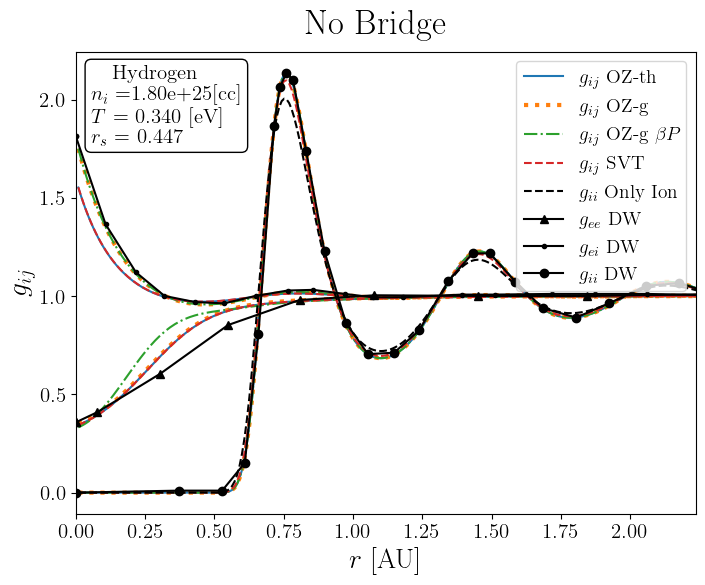

In [9]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
fig.suptitle("No Bridge", fontsize=25, y=0.95)

ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_th.hnc.h_r_matrix[1,1]+1, color=colors[0], label=r'$g_{ij}$ OZ-th')
ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_th.hnc.h_r_matrix[1,0]+1, color=colors[0])#, label=r'$g_{ei}$ OZ-th')
ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_th.hnc.h_r_matrix[0,0]+1, color=colors[0])#, label=r'$g_{ii}$ OZ-th')

ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_geom.hnc.h_r_matrix[1,1]+1,':', color=colors[1], linewidth=3, label=r'$g_{ij}$ OZ-g')
ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_geom.hnc.h_r_matrix[1,0]+1,':', color=colors[1], linewidth=3)#, label=r'$g_{ei}$ OZ-g')
ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_geom.hnc.h_r_matrix[0,0]+1,':', color=colors[1], linewidth=3)#, label=r'$g_{ii}$ OZ-g')

ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_geom_βP.hnc.h_r_matrix[1,1]+1,'-.', color=colors[2], label=r'$g_{ij}$ OZ-g $\beta P$')
ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_geom_βP.hnc.h_r_matrix[1,0]+1,'-.', color=colors[2])#, label=r'$g_{ei}$ OZ-g')
ax.plot(plasma_oz_th.hnc.r_array*ri_AU, plasma_oz_geom_βP.hnc.h_r_matrix[0,0]+1,'-.', color=colors[2])#, label=r'$g_{ii}$ OZ-g')

ax.plot(plasma_svt.hnc.r_array*ri_AU, plasma_svt.hnc.h_r_matrix[1,1]+1, '--', color=colors[3], label=r'$g_{ij}$ SVT')
ax.plot(plasma_svt.hnc.r_array*ri_AU, plasma_svt.hnc.h_r_matrix[1,0]+1, '--', color=colors[3])#, label=r'$g_{ei}$ SVT')
ax.plot(plasma_svt.hnc.r_array*ri_AU, plasma_svt.hnc.h_r_matrix[0,0]+1, '--', color=colors[3])#, label=r'$g_{ii}$ SVT')

ax.plot(plasma_svt.hnc.r_array*ri_AU, plasma_svt.onlyion_hnc.h_r_matrix[0,0]+1, 'k--', label=r'$g_{ii}$ Only Ion')

g_comparison(ax)
ax.set_xlim(0,ri_AU*5)


## To get better agreement of $g_{ee}$

#### Ideas:
> * Must be βv_ee somehow
> * Switch method of computing βP_ee to DST instead of explicit
> * See if Deutsch is used for βv_ee or something else. See two notebooks named "QSP_HNC_Two_Electrons" and "QSP_HNC_Two_Electron_Plasma"